## Linjär klassificering

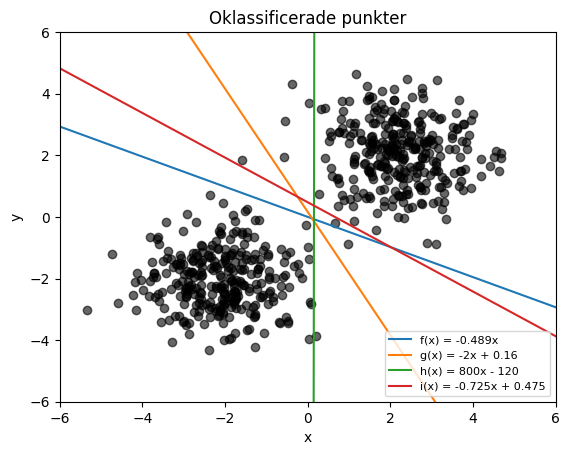

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable
# The function "calculate_y_on_separator" is named as "i" to suit the other function names
from linear_classification_utils import f, g, h, calculate_y_on_separator as i, get_classification_label_for_point

def get_unlabelled_points() -> list:
    points = []

    with open("Data/unlabelled_data.csv", "r") as file:
        for line in file:
            x, y = [float(v.strip()) for v in line.split(",")] # Get values for x and y as floats from the line
            point = (x, y)
            points.append(point)
    
    return points


# Get the unlabelled points that will be used on multiple occasions in the report.
# By getting the points here, we avoid reading from the csv-file multiple times.
unlabelled_points = get_unlabelled_points()


X = np.linspace(-6, 6)

fig, ax = plt.figure(dpi=100), plt.axes()

ax.plot(X, [f(x) for x in X], label="f(x) = -0.489x")
ax.plot(X, [g(x) for x in X], label="g(x) = -2x + 0.16")
ax.plot(X, [h(x) for x in X], label="h(x) = 800x - 120")
ax.plot(X, [i(x) for x in X], label="i(x) = -0.725x + 0.475")
ax.set(title="Oklassificerade punkter", xlabel="x", ylabel="y")
ax.set_xlim((-6, 6))
ax.set_ylim((-6, 6))
ax.scatter([p[0] for p in unlabelled_points], [p[1] for p in unlabelled_points], alpha=0.6, c="black")
ax.legend(loc="lower right", prop={'size': 8})

plt.show()

Ovan målas alla oklassificerade punkter upp, samt fyra linjer som kan användas för att klassificera punkterna.

i(x) är den linje jag själv valde att dra då den delade punkterna jämnt med 300 på ena sidan om linjen och 300 på andra.

Som man kan se är det en del punkter som klassificeras olika beroende på vilken linje som används. Man kan även se tydliga områden där det är självklart vilken klassificering det ska bli.

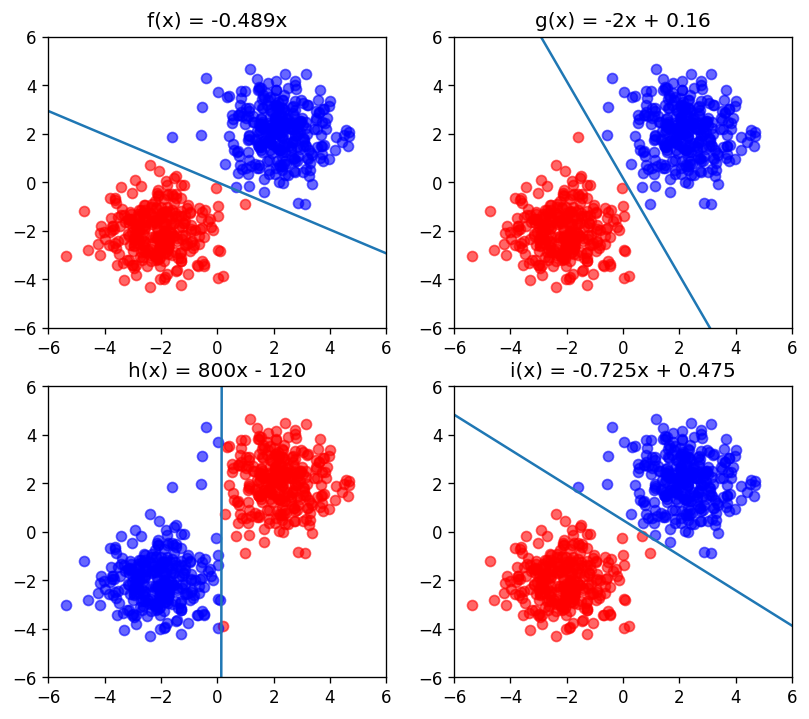

In [2]:
def classify_data(points: tuple, function: Callable) -> tuple:
    red_points = []
    blue_points = []

    for point in points:
        label = get_classification_label_for_point(point, function)
        
        if label == 1:
            blue_points.append(point)
        else:
            red_points.append(point)

    return red_points, blue_points


def plot_in_subplot(ax, f: Callable, title: str) -> None:
    X = np.linspace(-6, 6)

    red, blue = classify_data(unlabelled_points, f)
        
    ax.set(title=title)

    ax.set_xlim((-6, 6))
    ax.set_ylim((-6, 6))

    ax.plot(X, [f(x) for x in X])
    ax.scatter([p[0] for p in red], [p[1] for p in red], alpha=0.6, c="red")
    ax.scatter([p[0] for p in blue], [p[1] for p in blue], alpha=0.6, c="blue")


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, dpi=120, figsize=(8, 6))

plot_in_subplot(ax1, f, "f(x) = -0.489x")
plot_in_subplot(ax2, g, "g(x) = -2x + 0.16")
plot_in_subplot(ax3, h, "h(x) = 800x - 120")
plot_in_subplot(ax4, i, "i(x) = -0.725x + 0.475")

plt.subplots_adjust(top=1) # Used to increase the spacing between the rows of the plot
plt.show()

Här målas de olika linjerna upp i varsin subplot, och punkterna klassificeras med respektive linje, och samma funktion används för alla subplots för att avgöra om punkten ligger över eller under linjen.

Som vi kan se för linjen h(x) så blir färgerna tvärtom. Anledningen till detta är att linjen har en positiv lutning. Då blir det de punkter som är till vänster om linjen som är ovanför linjen. Detta blir inte riktigt rätt. Om blå betyder att det är en hund och röd betyder att det är en katt, kan inte dessa klassificeringar skifta på detta sätt för att linjen har positiv lutning.



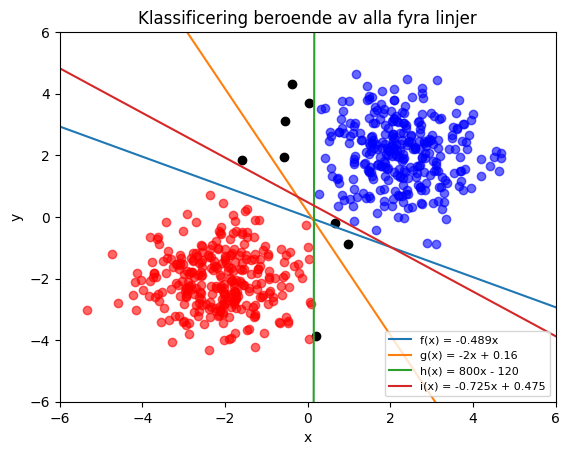

In [3]:
def get_label_by_function(point: tuple, function: Callable) -> int:
    x, y = point
    
    # Handle if the line has positive slope (y increment for every x)
    is_positive_slope = function(x+1) > function(x)
    if is_positive_slope:
        return 0 if y > function(x) else 1

    return 1 if y > function(x) else 0


unclassified_points = []
red_points = []
blue_points = []

for point in unlabelled_points:
    labels = [get_label_by_function(point, function) for function in [f, g, h, i]]

    # Check if all labels in the list are the same
    if len(set(labels)) == 1:
        # If all the functions resulted in the same label/classification, add the point to the correct classification-list.
        label = labels[0]
        if label == 1:
            blue_points.append(point)
        else:
            red_points.append(point)
    else:
        unclassified_points.append(point)


X = np.linspace(-6, 6)

fig, ax = plt.figure(dpi=100), plt.axes()

ax.plot(X, [f(x) for x in X], label="f(x) = -0.489x")
ax.plot(X, [g(x) for x in X], label="g(x) = -2x + 0.16")
ax.plot(X, [h(x) for x in X], label="h(x) = 800x - 120")
ax.plot(X, [i(x) for x in X], label="i(x) = -0.725x + 0.475")
ax.set(title="Klassificering beroende av alla fyra linjer", xlabel="x", ylabel="y")
ax.set_xlim((-6, 6))
ax.set_ylim((-6, 6))
ax.scatter([p[0] for p in unclassified_points], [p[1] for p in unclassified_points], alpha=1, c="black")
ax.scatter([p[0] for p in red_points], [p[1] for p in red_points], alpha=0.6, c="red")
ax.scatter([p[0] for p in blue_points], [p[1] for p in blue_points], alpha=0.6, c="blue")
ax.legend(loc="lower right", prop={'size': 8})

plt.show()

I grafen ovan målas alla punkter upp igen tillsammans med de fyra linjerna. Här klassificeras de punkter som får samma klass för alla dessa linjer. De punkter som är svarta är sådana som inte har samma klassificering för alla avdelande linjer. Alla linjer delar punkterna mer eller mindre jämt, men det är en del punkter som skiljer sig i klassificering beroende på vilken ekvation som används.

För att få det resultat jag var ute efter i denna graf, såg jag till att funktionen som ger mig label för punkt måste ta hänsyn till om lutningen för linjen är positiv. Då ska den istället ge 0 om värdet på y är större än värdet på y för linjen på samma x.

Som vi kan se finns det en del punkter som inte alltid får samma klassificering, men vi kan samtidigt se områden där det är mycket tydligt vilken klassificering punkterna tillhör. Vi kan tydligt se att punkter långt upp till vänster, samt långt ner till höger skulle vara svåra att klassificera, och att dessa skulle kunna klassificeras olika beroende på vilken linje som används.

Det finns egentligen ingen begränsning på antalet linjer som kan ritas upp för att skilja på klasserna, och att bestämma vilken linje som är den bästa och mest passande är svårt. Det kan bero på vad det är för data vi har och vilka faktorer som är x och y i detta fall. Om man hade vetat vad x och y stod för, kanske man skulle komma fram till någon lutning och placering för linjen som skulle passa bäst.

Jag skulle dock vilja säga att en linje som h(x) eller en linje som skulle uppfattas helt vågrät inte passar så bra för att klassificera i detta fall. Den nedersta svarta punkten i grafen ovan som ligger väldigt nära den röda gruppen tycker jag borde klassas som röd eftersom den ligger så nära, men med linjen h(x) klassas denna istället som den andra klassen.